# A. Normalisation mean-std (Standarisation)

Lien utile: [Click me](https://en.wikipedia.org/wiki/Normalization_(statistics))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn import preprocessing 

###### 1. Création de la matrice X 

In [2]:
X = np.array([[1,-1,2],
          [2,0,0],
          [0,1,-1]])
print(X)

[[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]


###### 2. Calcul de la moyenne et la variance sur les variables (features) 

In [3]:
moyenne = X.mean(axis=0)
variance = X.var(axis=0)

In [4]:
print("La moyenne: ", moyenne, "| La variance: ", variance)

La moyenne:  [1.         0.         0.33333333] | La variance:  [0.66666667 0.66666667 1.55555556]


###### 3. La méthode ```.scale()```

In [5]:
X_normalise = scale(X, axis = 0, with_mean = True, with_std = True) #axe = 0
print(X_normalise)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


On constate que la méthode a réalisé la normalisation 0 moyenne et variance unité (1). C'est à dire ramener la variance de chaque variable à 1 et sa moyenne à 0.

###### 4. Moyenne et variance après normalisation

In [25]:
moyenne = X_normalise.mean(axis=0)
variance = X_normalise.var(axis=0)
print("La moyenne sur les variables: ", moyenne, "| La variance sur les variables: ", variance)
moyenne = X_normalise.mean()
variance = X_normalise.var()
print("La moyenne: ", moyenne, "| La variance: ", variance)

La moyenne sur les variables:  [0. 0. 0.] | La variance sur les variables:  [1. 1. 1.]
La moyenne:  4.9343245538895844e-17 | La variance:  1.0


La variance est ramenée à 1, c'est la standarization des données qu'on peut ré-implémenter comme suite:

In [7]:
new = [[0,0,0] for x in range(3)] 
for i in range(3):
    for j in range(3):
        new[i][j] = (X[i][j] - X.mean(0)[j])/X.std(0)[j]
new = np.array(new)

In [8]:
moyenne = new.mean(axis=0)
variance = new.var(axis=0)
print("La moyenne sur les variables: ", moyenne, "| La variance sur les variables: ", variance)
moyenne = new.mean()
variance = new.var()
print("La moyenne: ", moyenne, "| La variance: ", variance)

La moyenne sur les variables:  [0. 0. 0.] | La variance sur les variables:  [1. 1. 1.]
La moyenne:  4.9343245538895844e-17 | La variance:  1.0


# B. Normalisation MinMax

###### 1. Création de la matrice X2

In [9]:
X2 = np.array([[1,-1,2],
          [2,0,0],
          [0,1,-1]])

In [10]:
print(X2)

[[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]


###### 2. Calcul de la moyenne sur les variables (features) 

In [11]:
moyenne = X2.mean(axis=0)
print("La moyenne sur les variables: ", moyenne)

La moyenne sur les variables:  [1.         0.         0.33333333]


###### 3. Après normalisation

In [12]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X2_normalise = min_max_scaler.fit_transform(X2)
print(X2_normalise)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [13]:
moyenne = X2_normalise.mean(0)
print("La moyenne sur les variables: ", moyenne)

La moyenne sur les variables:  [0.5        0.5        0.44444444]


Les données sont normalisées entre un minimum 0 et un maximum 1 c'est à dire tous les valeurs sont dans l'intervalle [0, 1].
Alors, la moyyenne sur chaque variable doit certainement étre entre 0 et 1.

# C. Visualisation

On peut maintenant regarder les 6 combinations de variables:
 - a = 0, b = 1
 - a = 0, b = 2
 - a = 0, b = 3
 - a = 1, b = 2
 - a = 1, b = 3 
 - a = 2, b = 3


In [14]:
import pylab as pl
iris=load_iris()
X=iris.data
y=iris.target
print("Les variables: ", iris.feature_names)

Les variables:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


###### Pour ```a = 0, b = 1``` | sepal length (cm) ET sepal width (cm)

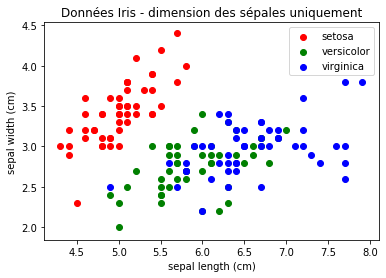

In [15]:
a = 0
b = 1
colors = ["red", "green", "blue"]
for i in range(3):
    plt.scatter(X[y==i][:,a], X[y==i][:,b], color=colors[i], label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[a])
plt.ylabel(iris.feature_names[b])
plt.title("Données Iris - dimension des sépales uniquement")
plt.show()

On remarque qu'on fixant des couleurs avec une liste et en spécifiant un autre paramètre ```label``` qui recoit les noms des classes, on peut ajouter une légende pour noter la désignation de chaque couleur.

###### Pour ```a = 0, b = 2``` | sepal length (cm) ET 'petal length (cm)'

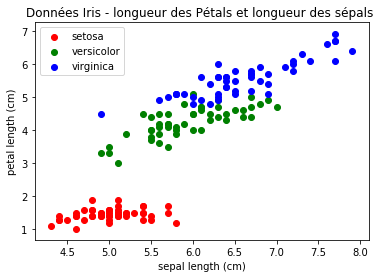

In [16]:
###### Pour ```a = 0, b = 2``` | sepal length (cm) ET 'petal length (cm)'a = 0
b = 2
colors = ["red", "green", "blue"]
for i in range(3):
    plt.scatter(X[y==i][:,a], X[y==i][:,b], color=colors[i], label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[a])
plt.ylabel(iris.feature_names[b])
plt.title("Données Iris - longueur des Pétals et longueur des sépals ") # changer le titre
plt.show()

###### Pour ```a = 0, b = 3``` | sepal length (cm) ET 'petal width (cm)'

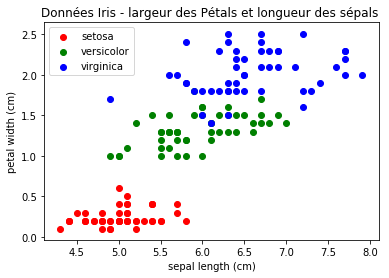

In [17]:
a = 0
b = 3
colors = ["red", "green", "blue"]
for i in range(3):
    plt.scatter(X[y==i][:,a], X[y==i][:,b], color=colors[i], label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[a])
plt.ylabel(iris.feature_names[b])
plt.title("Données Iris - largeur des Pétals et longueur des sépals ") # changer le titre
plt.show()

###### Pour ```a = 1, b = 2``` | sepal width (cm) ET 'petal length (cm)'

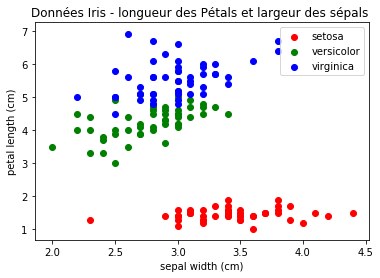

In [18]:
a = 1
b = 2
colors = ["red", "green", "blue"]
for i in range(3):
    plt.scatter(X[y==i][:,a], X[y==i][:,b], color=colors[i], label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[a])
plt.ylabel(iris.feature_names[b])
plt.title("Données Iris - longueur des Pétals et largeur des sépals ") # changer le titre
plt.show()

###### Pour ```a = 1, b = 3``` | sepal width (cm) ET 'petal width (cm)'

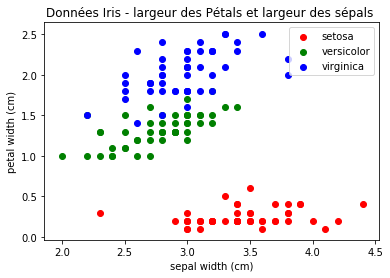

In [19]:
a = 1
b = 3
colors = ["red", "green", "blue"]
for i in range(3):
    plt.scatter(X[y==i][:,a], X[y==i][:,b], color=colors[i], label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[a])
plt.ylabel(iris.feature_names[b])
plt.title("Données Iris - largeur des Pétals et largeur des sépals ") # changer le titre
plt.show()

###### Pour ```a = 2, b = 3``` | petal length (cm) ET 'petal width (cm)'

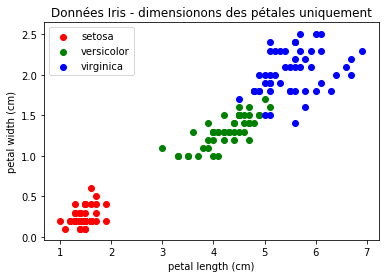

In [20]:
a = 2 # troisiemes variable
b = 3 # 4ieme variable
colors = ["red", "green", "blue"]###### Pour ```a = 1, b = 3``` | sepal width (cm) ET 'petal width (cm)'
for i in range(3):
    plt.scatter(X[y==i][:,a], X[y==i][:,b], color=colors[i], label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[a])
plt.ylabel(iris.feature_names[b])
plt.title("Données Iris - dimensionons des pétales uniquement") # changer le titre
plt.show()

On peut alors constater que les deux derniers couples d’attributs semble les mieux à discriminer les 3 classes d’iris car ils donnent une meilleur classification. 


# D. Réduction de dimensions et visualisation

On visualise selon 2 composantes principales!

In [21]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

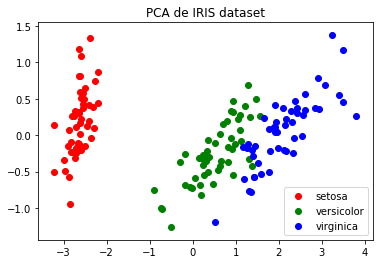

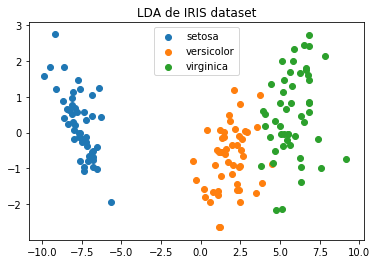

In [22]:
iris = load_iris()

data = iris.data
classes = iris.target
classes_names = iris.target_names

pca = PCA(n_components = 2)
iris_pca = pca.fit(data).transform(data)

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit(data, classes).transform(data)

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2

for color, i, classe_name in zip(colors, [0, 1, 2], classes_names):
    plt.scatter(iris_pca[classes == i, 0], iris_pca[classes == i, 1], color=color, label=classe_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA de IRIS dataset')

plt.figure()
for color, i, classe_name in zip(colors, [0, 1, 2], classes_names):
    plt.scatter(iris_lda[classes == i, 0], iris_lda[classes == i, 1], label=classe_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA de IRIS dataset')

plt.show()

In [23]:
print('Inertie de chaque composantes: %s' % str(pca.explained_variance_ratio_))

Inertie de chaque composantes: [0.92461872 0.05306648]


In [24]:
print('Inertie de chaque composantes: %s' % str(lda.explained_variance_ratio_))

Inertie de chaque composantes: [0.9912126 0.0087874]


On remarque que les deux méthode arrient, d'une façon presque similaire, à descriminer les classes selon les deux dimensions qui expriment plus de variance.